<a href="https://colab.research.google.com/github/Tomaz4lves/Biblioteca_pandas/blob/main/Predict_users_leaving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando biblioteca e dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
churn = pd.read_csv("streaming_data.csv")
churn.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


# Data Preparation


In [3]:
churn.drop('User_id', axis=1, inplace=True)

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
churn.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [6]:
churn.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
dtype: int64

In [7]:
# Substituindo valores "NaN" por 0 em colunas específicas
columns_to_fillna = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
churn[columns_to_fillna] = churn[columns_to_fillna].fillna(0)

In [8]:
churn.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
dtype: int64

In [9]:
# Descartar linhas nulas em determinadas colunas
churn.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

In [10]:
churn.isna().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
dtype: int64

In [11]:
# Transformando valores de churned de 0 e 1 para 'No' e 'Yes'
churn['Churned'] = churn['Churned'].replace({0: 'No', 1: 'Yes'})

In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 2.8+ MB


In [13]:
# Convertendo valores float para inteiros
churn['Avg_rating'] = churn['Avg_rating'].astype(int)
churn['Num_streaming_services'] = churn['Num_streaming_services'].astype(int)
churn['Devices_connected'] = churn['Devices_connected'].astype(int)
churn['Time_on_platform'] = churn['Time_on_platform'].astype(int)
churn['Age'] = churn['Age'].astype(int)

In [14]:
churn.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating
count,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000,36515.000000
mean,43.473422,3170.231576,2.039628,0.309434,2.993455,1.951006
std,15.092181,2909.245246,1.820622,0.909600,1.412968,1.435179
min,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,43.000000,2708.000000,2.000000,0.000000,3.000000,2.000000
75%,57.000000,5741.000000,4.000000,0.000000,4.000000,3.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000


# Modelagem dos Dados - Regressão Logística

In [15]:
churn.columns

Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Num_active_profiles',
       'Avg_rating', 'Churned'],
      dtype='object')

In [16]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
dtypes: int64(6), object(3)
memory usage: 2.8+ MB


In [17]:
# Definindo variáveis X e y para o modelo
X = churn[['Age', 'Gender', 'Time_on_platform', 'Devices_connected', 'Subscription_type', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']]
y = churn['Churned']

In [18]:
# Aplicando Label Encoding para colunas categóricas
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Subscription_type'] = label_encoder.fit_transform(X['Subscription_type'])


<ipython-input-18-809b611bb56a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = label_encoder.fit_transform(X['Gender'])
<ipython-input-18-809b611bb56a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Subscription_type'] = label_encoder.fit_transform(X['Subscription_type'])


In [19]:
# Aplicando Get Dummies para classificação One-Hot
X = pd.get_dummies(X)

In [20]:
# Transformando dados para 0 e 1 e em dataframe
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

In [21]:
# Separando em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Instanciando e treinando o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Fazendo previsões
predictions = model.predict(X_test)

In [24]:
# Atribui as previsões e os dados de teste
X_test.assign(churn = y_test).assign(label = model.predict(X_test))

,0,1,2,3,4,5,6,7,churn,label
11843,0.490196,1.0,0.706131,0.6,0.0,0.0,0.75,0.0,NaN,No
12678,0.980392,0.0,0.492636,0.6,1.0,0.0,0.75,0.8,NaN,No
35053,0.274510,0.0,0.097500,0.0,0.0,0.0,0.00,0.0,NaN,No
36421,0.411765,0.0,0.812992,0.0,1.0,0.0,0.25,0.0,NaN,No
19202,0.235294,0.0,0.303573,0.8,0.0,0.0,0.75,0.2,NaN,No
...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,1.0,0.000000,0.8,0.5,0.0,1.00,0.4,Yes,No
29606,0.470588,0.0,0.000000,0.0,0.0,0.0,0.50,0.2,NaN,No
35400,0.313725,0.0,0.715493,0.6,1.0,0.0,1.00,0.6,NaN,No
7825,0.941176,1.0,0.000000,0.2,0.0,0.0,0.50,0.4,NaN,No


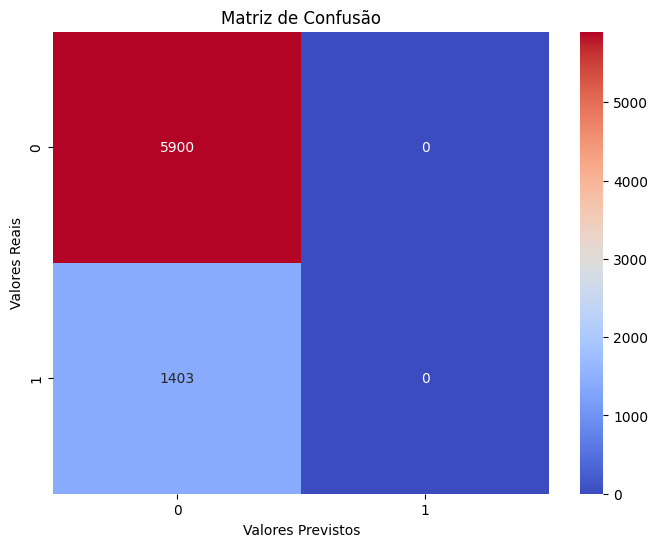

In [25]:
# Plot da matriz de confusão
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [26]:
# Gerando o relatório de classificação
classification_rep = classification_report(y_test, predictions, output_dict=True)
print(classification_rep)

print("\nRelatório de Classificação:")

for classe, metrics in classification_rep.items():
    if classe != 'accuracy':  # Evitando exibir a métrica 'accuracy' no loop
        print(f"Classe: {classe}")
        for metric, value in metrics.items():
            print(f"{metric.capitalize()}: {value:.3f}")  # Formatação para exibir 3 casas decimais
        print('-' * 30)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'No': {'precision': 0.8078871696563056, 'recall': 1.0, 'f1-score': 0.8937362720593804, 'support': 5900}, 'Yes': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1403}, 'accuracy': 0.8078871696563056, 'macro avg': {'precision': 0.4039435848281528, 'recall': 0.5, 'f1-score': 0.4468681360296902, 'support': 7303}, 'weighted avg': {'precision': 0.6526816788952763, 'recall': 0.8078871696563056, 'f1-score': 0.7220380672532308, 'support': 7303}}

Relatório de Classificação:
Classe: No
Precision: 0.808
Recall: 1.000
F1-score: 0.894
Support: 5900.000
------------------------------
Classe: Yes
Precision: 0.000
Recall: 0.000
F1-score: 0.000
Support: 1403.000
------------------------------
Classe: macro avg
Precision: 0.404
Recall: 0.500
F1-score: 0.447
Support: 7303.000
------------------------------
Classe: weighted avg
Precision: 0.653
Recall: 0.808
F1-score: 0.722
Support: 7303.000
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Modelagem dos Dados - Random Forest

In [27]:
# Definindo variáveis X e y para o modelo
X_rf = churn[['Age', 'Gender', 'Time_on_platform', 'Devices_connected', 'Subscription_type', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']]
y_rf = churn['Churned']

In [28]:
# Aplicando Label Encoding para colunas categóricas
label_encoder = LabelEncoder()
X_rf['Gender'] = label_encoder.fit_transform(X_rf['Gender'])
X_rf['Subscription_type'] = label_encoder.fit_transform(X_rf['Subscription_type'])

<ipython-input-28-5a3eba545071>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_rf['Gender'] = label_encoder.fit_transform(X_rf['Gender'])
<ipython-input-28-5a3eba545071>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_rf['Subscription_type'] = label_encoder.fit_transform(X_rf['Subscription_type'])


In [29]:
# Aplicando Get Dummies para classificação One-Hot
X_rf = pd.get_dummies(X_rf)

In [30]:
# Transformando dados para 0 e 1 e em dataframe
mm = MinMaxScaler()
X_rf = pd.DataFrame(mm.fit_transform(X_rf))

In [31]:
# Separando em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [32]:
# Instanciando e treinando o modelo de Random Forest
rf =  RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Fazendo previsões
predictions_rf = rf.predict(X_test)

In [34]:
# Atribui as previsões e os dados de teste
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,churn,label
11843,0.490196,1.0,0.706131,0.6,0.0,0.0,0.75,0.0,NaN,No
12678,0.980392,0.0,0.492636,0.6,1.0,0.0,0.75,0.8,NaN,No
35053,0.274510,0.0,0.097500,0.0,0.0,0.0,0.00,0.0,NaN,Yes
36421,0.411765,0.0,0.812992,0.0,1.0,0.0,0.25,0.0,NaN,Yes
19202,0.235294,0.0,0.303573,0.8,0.0,0.0,0.75,0.2,NaN,No
...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,1.0,0.000000,0.8,0.5,0.0,1.00,0.4,Yes,No
29606,0.470588,0.0,0.000000,0.0,0.0,0.0,0.50,0.2,NaN,No
35400,0.313725,0.0,0.715493,0.6,1.0,0.0,1.00,0.6,NaN,No
7825,0.941176,1.0,0.000000,0.2,0.0,0.0,0.50,0.4,NaN,No


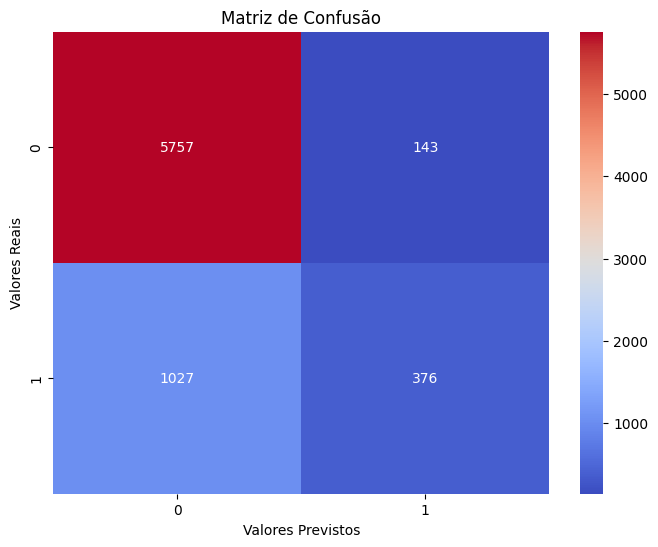

In [35]:
# Plot da matriz de confusão do Random Forest
cm_rf = confusion_matrix(y_test, predictions_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [49]:
# Gerando o relatório de classificação Random Forest
classification_rep_rf = classification_report(y_test, predictions_rf, output_dict=True)


print("\nRelatório de Classificação:")

for classe, metrics in classification_rep_rf.items():
    if classe != 'accuracy':  # Evitando exibir a métrica 'accuracy' no loop
        print(f"Classe: {classe}")
        for metric, value in metrics.items():
            print(f"{metric.capitalize()}: {value:.3f}")  # Formatação para exibir 3 casas decimais
        print('-' * 30)


Relatório de Classificação:
Classe: No
Precision: 0.849
Recall: 0.976
F1-score: 0.908
Support: 5900.000
------------------------------
Classe: Yes
Precision: 0.724
Recall: 0.268
F1-score: 0.391
Support: 1403.000
------------------------------
Classe: macro avg
Precision: 0.787
Recall: 0.622
F1-score: 0.650
Support: 7303.000
------------------------------
Classe: weighted avg
Precision: 0.825
Recall: 0.840
F1-score: 0.809
Support: 7303.000
------------------------------


# Tuning dos Modelos

In [37]:
# Encontrando melhores parâmetros com o GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [100, 200, 300]})

In [51]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
# Adicionando os melhores parâmetros no Random Forest
rf_tunned =  RandomForestClassifier(bootstrap = True,
                                    ccp_alpha = 0.0,
                                    class_weight = None,
                                    criterion= 'gini',
                                    max_depth = None,
                                    max_features= 'sqrt',
                                    max_leaf_nodes = None,
                                    max_samples = None,
                                    min_impurity_decrease = 0.0,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2,
                                    min_weight_fraction_leaf = 0.0,
                                    n_estimators = 300,
                                    n_jobs = None,
                                    oob_score = False,
                                    random_state = None,
                                    verbose = 0,
                                    warm_start = False)

In [40]:
# Treinando modelo com novos parâmetros
rf_tunned.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [45]:
# Realizando previsões com o X_test usando os novos parâmetros
predictions_tunned = rf_tunned.predict(X_test)

In [46]:
# Atribui as previsões e os dados de teste
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,churn,label
11843,0.490196,1.0,0.706131,0.6,0.0,0.0,0.75,0.0,NaN,No
12678,0.980392,0.0,0.492636,0.6,1.0,0.0,0.75,0.8,NaN,No
35053,0.274510,0.0,0.097500,0.0,0.0,0.0,0.00,0.0,NaN,Yes
36421,0.411765,0.0,0.812992,0.0,1.0,0.0,0.25,0.0,NaN,Yes
19202,0.235294,0.0,0.303573,0.8,0.0,0.0,0.75,0.2,NaN,No
...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,1.0,0.000000,0.8,0.5,0.0,1.00,0.4,Yes,No
29606,0.470588,0.0,0.000000,0.0,0.0,0.0,0.50,0.2,NaN,No
35400,0.313725,0.0,0.715493,0.6,1.0,0.0,1.00,0.6,NaN,No
7825,0.941176,1.0,0.000000,0.2,0.0,0.0,0.50,0.4,NaN,No


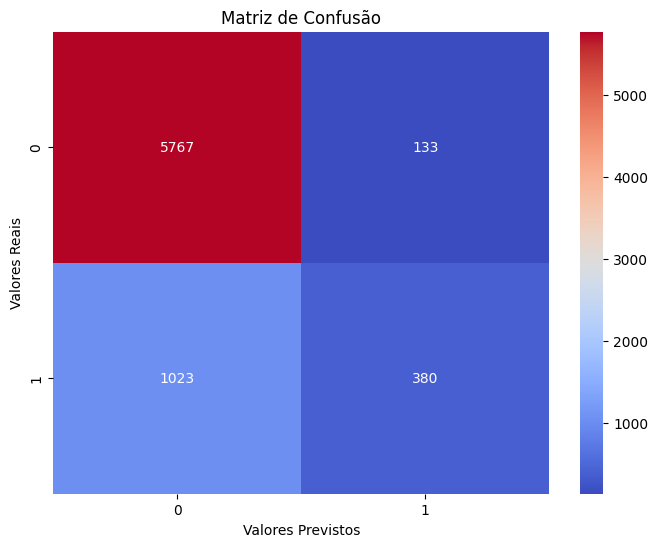

In [47]:
# Plot da matriz de confusão do Random Forest
cm_rf_tunned = confusion_matrix(y_test, predictions_tunned)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tunned, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [50]:
# Gerando o relatório de classificação Random Forest com tunned
classification_rep_tunned = classification_report(y_test, predictions_tunned, output_dict=True)

print("\nRelatório de Classificação:")

for classe, metrics in classification_rep_tunned.items():
    if classe != 'accuracy':  # Evitando exibir a métrica 'accuracy' no loop
        print(f"Classe: {classe}")
        for metric, value in metrics.items():
            print(f"{metric.capitalize()}: {value:.3f}")  # Formatação para exibir 3 casas decimais
        print('-' * 30)


Relatório de Classificação:
Classe: No
Precision: 0.849
Recall: 0.977
F1-score: 0.909
Support: 5900.000
------------------------------
Classe: Yes
Precision: 0.741
Recall: 0.271
F1-score: 0.397
Support: 1403.000
------------------------------
Classe: macro avg
Precision: 0.795
Recall: 0.624
F1-score: 0.653
Support: 7303.000
------------------------------
Classe: weighted avg
Precision: 0.828
Recall: 0.842
F1-score: 0.810
Support: 7303.000
------------------------------
